# EM-algorithm

In [2]:
from scipy.stats import multivariate_normal
from scipy.stats import laplace
from matplotlib import pyplot
from tqdm import tqdm_notebook as tqdm

import numpy as np
%matplotlib notebook

INITIAL_VARIANCE = 1

## 1. Normal distribution

In [3]:
def calculate_identifiers(points, weights, means):
    probabilities = np.array([np.array([multivariate_normal.pdf(points[i], means[j])
                                        for j in range(0, means.shape[0])])
                              for i in range(0, points.shape[0])])

    return np.array([np.array([weights[j] * probabilities[i][j] / np.sum(probabilities[i].dot(weights))
                               for j in range(0, means.shape[0])]).argmax()
                     for i in range(0, points.shape[0])])

In [4]:
def calculate_parameters(points, identifiers, class_count):
    sums = np.zeros((class_count, 1))
    for i in identifiers:
        sums[i] += 1
    weights = sums / points.shape[0]

    means = np.zeros((class_count, points.shape[1]))
    for i in range(0, points.shape[0]):
        means[identifiers[i]] += points[i]
    means = means / sums

    return weights, means

In [5]:
def find_classes(points, class_count, iterations = 10):
    means = np.copy(points[:class_count])
    variances = np.full((class_count, points.shape[1]), INITIAL_VARIANCE)
    weights = np.full((class_count), 1 / class_count)

    for i in tqdm(range(iterations)):
        identifiers = calculate_identifiers(points, weights, means)
        weights, means = calculate_parameters(points, identifiers, class_count)

    return points, identifiers

## 2. Laplase with Euclidian or Manhattan metric

#### Euclidian metric

In [6]:
def metric(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5

#### Manhattan metric

In [7]:
def metric(x, y):
    return abs(x[0]-y[0]) + abs(x[1]-y[1])

#### Main

In [8]:
def calculate_identifiers(points, weights, means):
    probabilities = np.array([np.array([laplace.pdf(metric(points[i], means[j]))  
                                        for j in range(0, means.shape[0])])
                              for i in range(0, points.shape[0])])

    return np.array([np.array([weights[j] * probabilities[i][j] / np.sum(probabilities[i].dot(weights))
                               for j in range(0, means.shape[0])]).argmax()
                     for i in range(0, points.shape[0])])

In [9]:
def calculate_parameters(points, identifiers, class_count):
    sums = np.zeros((class_count, 1))
    for i in identifiers:
        sums[i] += 1
    weights = sums / points.shape[0]

    means = np.zeros((class_count, points.shape[1]))
    for i in range(0, points.shape[0]):
        means[identifiers[i]] += points[i]
    means = means / sums

    return weights, means

In [10]:
def find_classes(points, class_count, iterations = 10):
    means = np.copy(points[:class_count])
    variances = np.full((class_count, points.shape[1]), INITIAL_VARIANCE)
    weights = np.full((class_count), 1 / class_count)

    for i in tqdm(range(iterations)):
        identifiers = calculate_identifiers(points, weights, means)
        weights, means = calculate_parameters(points, identifiers, class_count)

    return points, identifiers

## Reading files and test functions

In [11]:
def read_values(filename):
    _data = None
    _types = None
    with open(filename) as file:
        for line in file:
            args = np.array(list(map(lambda x: float(x), filter(lambda x: x is not '', line.strip().split(' ')))))
            if _data is None:
                _data = np.array(args[:-1])
                _types = np.array(args[-1])
            else:
                _data = np.vstack([_data, args[:-1]])
                _types = np.vstack([_types, args[-1]])
    return _data, _types

In [12]:
def test_separated_2():
    data, types = read_values("datasets/separated_2.txt")

    pyplot.subplot(121)
    pyplot.title('Initial')
    pyplot.scatter(data[:, 0], data[:, 1], c=types[:, 0])

    # print(data)
    data, types = find_classes(data, 2)
    pyplot.subplot(122)
    pyplot.title('Generated')
    pyplot.scatter(data[:, 0], data[:, 1], c=types)
    pyplot.show()

In [13]:
def test_separated_10():
    data, types = read_values("datasets/separated_10.txt")

    pyplot.subplot(121)
    pyplot.title('Initial')
    pyplot.scatter(data[:, 0], data[:, 1], c=types[:, 0])

    # print(data)
    data, types = find_classes(data, 10)
    pyplot.subplot(122)
    pyplot.title('Generated')
    pyplot.scatter(data[:, 0], data[:, 1], c=types)
    pyplot.show()

In [14]:
def test_intercepted_7():
    data, types = read_values("datasets/intercepted_7.txt")
    pyplot.subplot(121)
    pyplot.title('Initial')
    pyplot.scatter(data[:, 0], data[:, 1], c=types[:, 0])
    # print(data)
    data, types = find_classes(data, 7)
    pyplot.subplot(122)
    pyplot.title('Generated')
    pyplot.scatter(data[:, 0], data[:, 1], c=types)
    pyplot.show()

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

/Users/razumov/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


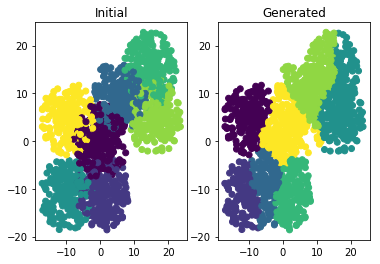

In [15]:
test_intercepted_7()